In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 오차제곱합

In [2]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # softmax output
t = [0,0,1,0,0,0,0,0,0,0] # onehotencoding

In [3]:
def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [4]:
t = [0,0,1,0,0,0,0,0,0,0] # label=2
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2일 확률이 가장 높다
sum_squares_error(np.array(y),np.array(t))

0.09750000000000003

In [5]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0] # 7일 확률이 가장 높다
sum_squares_error(np.array(y),np.array(t))

0.5975

## 교차 엔트로피

In [6]:
def cross_entropy_error(y,t):
    delta = 1e-7 # 절대 0이 되지 않도록 만듦
    return -np.sum(t*np.log(y+delta))

In [7]:
t = [0,0,1,0,0,0,0,0,0,0] # label=2
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0] # 2일 확률이 가장 높다
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [8]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0] # 7일 확률이 가장 높다
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

## mini batch

In [9]:
from mnist import load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10 # mini batch
batch_mask = np.random.choice(train_size,batch_size) # random sampling
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
batch_mask

array([ 3454, 51500,  1199, 25048, 38905, 43618, 53597, 53874,  1002,
       23043])

## 배치용 교차 엔트로피 오차 구현

In [12]:
def cross_entropy_error(y,t): # label = onehotencoding
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [13]:
def cross_entropy_error(y,t): # label = number label
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

## 미분

In [14]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

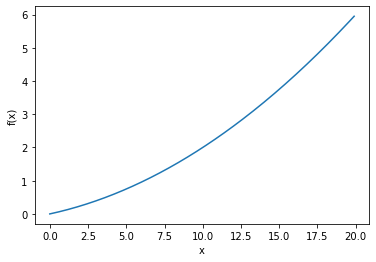

In [15]:
def function_1(x): # y= 0.01x^2 + 0.1x
    return 0.01*x**2 + 0.1*x
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [16]:
numerical_diff(function_1,5) # 미분 값

0.1999999999990898

In [17]:
numerical_diff(function_1,10) # 미분값

0.2999999999986347

## 편미분

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [19]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [20]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2,4.0)

7.999999999999119

## 기울기

In [21]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val+h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val-h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

In [22]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [23]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [24]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

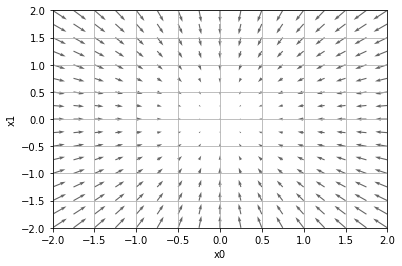

In [25]:
# gradient_2d.py
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## 경사하강법

In [26]:
def gradient_descent(f,init_x,lr = 0.01,step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -=lr*grad
    return x

In [27]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
init_x = np.array([-3.0,4.0]) # learning_rate too big
gradient_descent(function_2,init_x = init_x,lr = 10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [29]:
init_x = np.array([-3.0,4.0]) # learning_rate too small
gradient_descent(function_2,init_x = init_x, lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

In [30]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.22967336  0.30521311 -0.53488647]
 [ 0.34451004  0.45781966 -0.80232971]]


In [31]:
net = simpleNet()
print(net.W)

[[-1.12002752  0.54240171 -0.82843932]
 [ 1.46228156 -0.27406017  0.02024871]]


In [32]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[ 0.64403689  0.07878687 -0.47883975]


In [33]:
np.argmax(p)

0

In [34]:
t= np.array([0,0,1])
net.loss(x,t)

1.761335037993829

In [35]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W)
print(dW)

[[ 0.31686319  0.18004739 -0.49691057]
 [ 0.47529478  0.27007108 -0.74536586]]


In [36]:
f = lambda w: net.loss(x,t)
dW = numerical_gradient(f,net.W)

In [37]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [38]:
net = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [39]:
x = np.random.rand(100,784)
y = net.predict(x)


In [40]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x,t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [42]:
import numpy as np
from mnist import load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
train_loss_list = []
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1
network = TwoLayerNet(input_size = 784,hidden_size = 50,output_size=10)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    grad = network.gradient(x_batch,t_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= lr * grad[key]
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

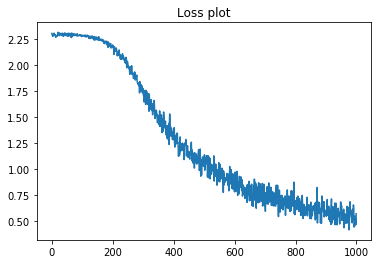

In [44]:
plt.plot(train_loss_list)
plt.title('Loss plot')
plt.show()

In [49]:
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size,1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch,t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= lr*grad[key]
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i% iter_per_epoch == 0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | '+str(train_acc)+','+str(test_acc))

train acc, test acc | 0.10441666666666667,0.1028
train acc, test acc | 0.78685,0.7903
train acc, test acc | 0.8790333333333333,0.8835
train acc, test acc | 0.8996333333333333,0.9029
train acc, test acc | 0.9096333333333333,0.9113
train acc, test acc | 0.9162166666666667,0.9181
train acc, test acc | 0.9205833333333333,0.9231
train acc, test acc | 0.92445,0.9257
train acc, test acc | 0.9292666666666667,0.9304
train acc, test acc | 0.9320333333333334,0.9331
train acc, test acc | 0.9335166666666667,0.9338
train acc, test acc | 0.9382,0.9388
train acc, test acc | 0.9398666666666666,0.94
train acc, test acc | 0.9423333333333334,0.9408
train acc, test acc | 0.9443166666666667,0.9423
train acc, test acc | 0.9461833333333334,0.9443
train acc, test acc | 0.9478833333333333,0.9463


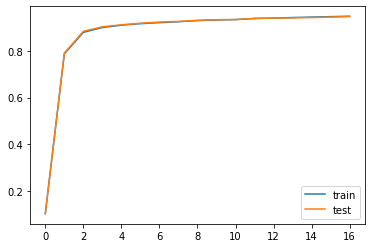

In [53]:
plt.plot(train_acc_list,label='train')
plt.plot(test_acc_list,label='test')
plt.legend()
plt.show()